In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

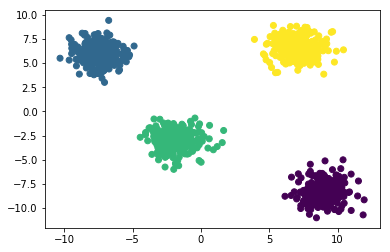

In [2]:
X, y = make_blobs(n_samples=1000, centers=4) # y here is vote
plt.scatter(X[:, 0], X[:, 1], c=y) 

In [3]:
# train_test_split?

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# test_size means 33% will be test data

In [5]:
class KNNCustom:
    
    def __init__(self, k=5):
        self.k = k
    
    # fit is used to give train data
    # no processing done here
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict_point(self, point):
        
        distances = []
        
        for x_item, y_item in zip(self.X, self.y):
            dis = KNNCustom.distance(point, x_item)
            distances.append((dis, y_item))
        
        dis_sorted = sorted(distances) # sorted by item zero (distance)
        top_k = dis_sorted[:self.k] # get top k items from list
        top = np.array(top_k) # convert it to numpy
        vals, counts = np.unique(top[:, 1], return_counts=True) # will tell how many times we will get 0 and 1
        
        
        # argmax gives index of max item. so we got max voting 
        # and took item coressponding to that
        return vals[np.argmax(counts)] 
    
    def predict(self, X):
        results = []
        for point in X:
            results.append(self.predict_point(point))
        
        return np.array(results, dtype=int)
    
    def score(self, X, y):
        y_out = self.predict(X)
        return np.mean(y_out == y)
    
    @classmethod
    def distance(cls, source, target):
        return np.sum((source - target) ** 2)

In [6]:
model = KNNCustom(20)
model.fit(X_train, y_train)
model.predict(X[:10])

array([2, 1, 0, 2, 0, 3, 0, 1, 0, 2])

In [7]:
y_test[:10]

array([3, 1, 1, 0, 0, 1, 1, 2, 0, 3])

In [8]:
X_test[0]

array([7.00036382, 7.24643613])

In [9]:
a = np.array([4,3])
b = np.array([1,2])

np.sum((a - b) ** 2)

10

In [10]:
model.score(X_test, y_test)

1.0

In [11]:
# model.predict(X_test)

In [12]:
# Doing same thing using sklearn

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
m2 = KNeighborsClassifier(4)

In [15]:
m2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [16]:
m2.predict(X_test[:10])

array([3, 1, 1, 0, 0, 1, 1, 2, 0, 3])

In [17]:
y_test[:10]

array([3, 1, 1, 0, 0, 1, 1, 2, 0, 3])

In [18]:
m2.score(X_test, y_test)

1.0

In [19]:
# mnist : photos of handwritten digits

In [20]:
data = np.load("datasets/mnist_train_small.npy")
data.shape  # 784 because 28*28 ki image thi

(19999, 785)

In [21]:
# np.save?
data.max()

255

In [22]:
X = data[:,1:]
y = data[:,0]

In [23]:
img = X[0].reshape(28,28)

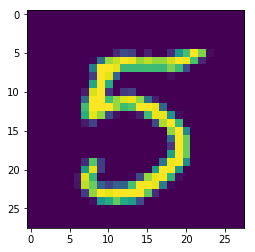

In [24]:
plt.imshow(img)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
m2 = KNeighborsClassifier(4)

In [27]:
m2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [28]:
m2.score(X_train[:100], y_train[:100])  

0.97